# Unit 5 - Financial Planning

In [303]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [304]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [305]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [306]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [307]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()


In [308]:
# checking if the request command works correctly or not for Bitcoin data
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18735812, 'total_supply': 18735812, 'max_supply': 21000000, 'quotes': {'USD': {'price': 40031.0, 'volume_24h': 36768197123, 'market_cap': 756254980470, 'percentage_change_1h': -2.82452491413357, 'percentage_change_24h': 0.82639937816624, 'percentage_change_7d': 19.6704925951377, 'percent_change_1h': -2.82452491413357, 'percent_change_24h': 0.82639937816624, 'percent_change_7d': 19.6704925951377}, 'CAD': {'price': 48817.8045, 'volume_24h': 44838816391.4985, 'market_cap': 922252948683.165, 'percent_change_1h': -2.82452491413357, 'percent_change_24h': 0.82639937816624, 'percent_change_7d': 19.6704925951377}}, 'last_updated': 1623785992}}, 'metadata': {'timestamp': 1623785992, 'num_cryptocurrencies': 1290, 'error': None}}


In [309]:
# Storing BTC prices in a variable
btc_closing_price = btc_data["data"]["1"]['quotes']['USD']['price']
btc_closing_price

40031.0

In [310]:
# checking if the request command works correctly or not for Eth data
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 116304785, 'total_supply': 116304785, 'max_supply': 0, 'quotes': {'USD': {'price': 2543.57, 'volume_24h': 26743953596, 'market_cap': 297882101117, 'percentage_change_1h': -2.2079711682635, 'percentage_change_24h': 0.0454783848842391, 'percentage_change_7d': -1.43252440306874, 'percent_change_1h': -2.2079711682635, 'percent_change_24h': 0.0454783848842391, 'percent_change_7d': -1.43252440306874}, 'CAD': {'price': 3101.883615, 'volume_24h': 32614251410.322, 'market_cap': 363267222312.181, 'percent_change_1h': -2.2079711682635, 'percent_change_24h': 0.0454783848842391, 'percent_change_7d': -1.43252440306874}}, 'last_updated': 1623785983}}, 'metadata': {'timestamp': 1623785983, 'num_cryptocurrencies': 1290, 'error': None}}


In [311]:
# Storing ETH prices in a variable
eth_closing_price = eth_data["data"]["1027"]['quotes']['USD']['price']
eth_closing_price

2543.57

In [312]:
#value of my Bitcoin
my_btc_value = my_btc*btc_closing_price
my_btc_value

48037.2

In [313]:
#value of my ETH
my_eth_value = my_eth*eth_closing_price
my_eth_value

13480.921

In [314]:
# Compute current value of my crpto

#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value}")

The current value of your 1.2 BTC is $48037.2
The current value of your 5.3 ETH is $13480.921


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [315]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [316]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version ="v2")

In [346]:
# Format current date as ISO format
start_date = pd.Timestamp("2017-01-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-10", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df= alpaca.get_barset(tickers,timeframe,start=start_date,end=end_date,limit=1000).df

#Preview DataFrame
df

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-01-10 00:00:00-05:00  108.45  108.5472  108.4200  108.460   2245513   
2017-01-11 00:00:00-05:00  108.53  108.9300  108.4200  108.585   3714128   
2017-01-12 00:00:00-05:00  108.78  108.9000  108.6100  108.620   2876232   
2017-01-13 00:00:00-05:00  108.50  108.5500  108.2610  108.440   3083926   
2017-01-17 00:00:00-05:00  108.81  108.8700  108.6500  108.790   3253649   
...                           ...       ...       ...      ...       ...   
2020-06-04 00:00:00-04:00  117.27  117.3000  116.8200  116.860   9562346   
2020-06-05 00:00:00-04:00  116.75  116.9100  116.4800  116.890   9025378   
2020-06-08 00:00:00-04:00  116.81  117.1092  116.7501  117.020  15737748   
2020-06-09 00:00:00-04:00  117.31  117.3300  117.1900  117.190  10803958   
2020-06-10 00:00:00-04:00  117.25  117.6800  117.1850  117.665   9007660   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2017-01-10 00:00:00-05:00  226.48  227.4500  226.0100  226.43   45365944  
2017-01-11 00:00:00-05:00  226.36  227.0700  225.5900  227.06   60070328  
2017-01-12 00:00:00-05:00  226.50  226.7500  224.9550  226.57   59431700  
2017-01-13 00:00:00-05:00  226.73  227.4000  226.6900  227.03   42877069  
2017-01-17 00:00:00-05:00  226.31  226.7800  225.8000  226.29   44347527  
...                           ...       ...       ...     ...        ...  
2020-06-04 00:00:00-04:00  311.11  313.0000  309.0800  311.31  136433327  
2020-06-05 00:00:00-04:00  317.23  321.2750  317.1600  319.27  245127534  
2020-06-08 00:00:00-04:00  320.22  323.4100  319.6300  323.25  128886698  
2020-06-09 00:00:00-04:00  320.30  323.2849  319.3600  320.81  135203810  
2020-06-10 00:00:00-04:00  321.42  322.3900  318.2209  319.01  167752089  

[860 rows x 10 columns]

In [318]:
# Pick AGG and SPY close prices
agg_close_price = df["AGG"]['close']
spy_close_price = df["SPY"]['close']
#Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2017-01-10 00:00:00-05:00    108.460
2017-01-11 00:00:00-05:00    108.585
2017-01-12 00:00:00-05:00    108.620
2017-01-13 00:00:00-05:00    108.440
2017-01-17 00:00:00-05:00    108.790
                              ...   
2020-06-04 00:00:00-04:00    116.860
2020-06-05 00:00:00-04:00    116.890
2020-06-08 00:00:00-04:00    117.020
2020-06-09 00:00:00-04:00    117.190
2020-06-10 00:00:00-04:00    117.665
Name: close, Length: 860, dtype: float64
Current SPY closing price: $time
2017-01-10 00:00:00-05:00    226.43
2017-01-11 00:00:00-05:00    227.06
2017-01-12 00:00:00-05:00    226.57
2017-01-13 00:00:00-05:00    227.03
2017-01-17 00:00:00-05:00    226.29
                              ...  
2020-06-04 00:00:00-04:00    311.31
2020-06-05 00:00:00-04:00    319.27
2020-06-08 00:00:00-04:00    323.25
2020-06-09 00:00:00-04:00    320.81
2020-06-10 00:00:00-04:00    319.01
Name: close, Length: 860, dtype: float64


In [319]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price 
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $time
2017-01-10 00:00:00-05:00    11321.5
2017-01-11 00:00:00-05:00    11353.0
2017-01-12 00:00:00-05:00    11328.5
2017-01-13 00:00:00-05:00    11351.5
2017-01-17 00:00:00-05:00    11314.5
                              ...   
2020-06-04 00:00:00-04:00    15565.5
2020-06-05 00:00:00-04:00    15963.5
2020-06-08 00:00:00-04:00    16162.5
2020-06-09 00:00:00-04:00    16040.5
2020-06-10 00:00:00-04:00    15950.5
Name: close, Length: 860, dtype: float64
The current value of your 200 AGG shares is $time
2017-01-10 00:00:00-05:00    21692.0
2017-01-11 00:00:00-05:00    21717.0
2017-01-12 00:00:00-05:00    21724.0
2017-01-13 00:00:00-05:00    21688.0
2017-01-17 00:00:00-05:00    21758.0
                              ...   
2020-06-04 00:00:00-04:00    23372.0
2020-06-05 00:00:00-04:00    23378.0
2020-06-08 00:00:00-04:00    23404.0
2020-06-09 00:00:00-04:00    23438.0
2020-06-10 00:00:00-04:00    23533.0
Name: close, Length: 860, dtype: float64


### Savings Health Analysis

In [320]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_spy_value[-1] + my_agg_value[-1]

# Create savings DataFrame
asset_data = {"Amount":[crypto_amount,shares_amount]}
asset_class = ["Crypto", "shares"]

df_savings = pd.DataFrame(asset_data,index =asset_class)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,61518.121
shares,39483.500


<AxesSubplot:title={'center':'Value of crypto and shares in my portfolio'}, ylabel='Amount'>

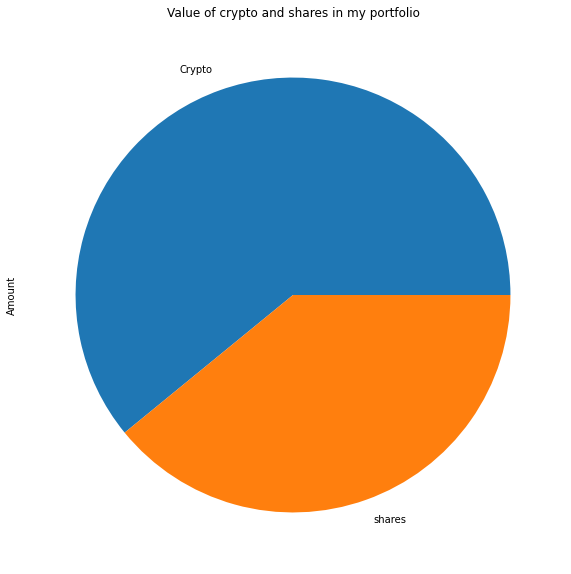

In [321]:
# Plot savings pie chart
df_savings["Amount"].plot.pie(y='Amount', figsize=(10,10),title ="Value of crypto and shares in my portfolio")

In [322]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Amount"].sum()
extra_savings = total_savings - emergency_fund
shortage_savings = emergency_fund - total_savings
# Validate saving health
if total_savings > emergency_fund :
    print(f"Congratulations! Your total savings are greater than your emergency funds and you have extra savings worth ${extra_savings}")
elif total_savings == emergency_fund :
    print(f"congratulation ! you have reached your financial goal")
else: 
    print(f"sorry! you don't meet your savings goals and you fall short by ${shortage_savings}")

Congratulations! Your total savings are greater than your emergency funds and you have extra savings worth $65001.621


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [323]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_1 = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_1 = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [324]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers,timeframe,start = start_date_1,end = end_date_1,limit =1000).df

# Display sample data
df_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
...                           ...       ...       ...      ...      ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370  3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440  6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370  5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500  5160765   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2017-05-11 00:00:00-04:00  239.35  239.57  238.1300  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.6700  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.4500  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.6300  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.7500  235.850  118613594  
...                           ...     ...       ...      ...        ...  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.640   44689009  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.480   45962264  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.350   45533863  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.980   70595229  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.300   73129109  

[1000 rows x 10 columns]

In [325]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
df_stock_data_mc_simulation = MCSimulation(df_stock_data,weights = [0.4,0.6],num_simulation = 500,num_trading_days = 252*30)

In [326]:
# Printing the simulation input data
df_stock_data_mc_simulation.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [327]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df_stock_data_mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986723,1.006524,0.997404,1.001260,1.001104,1.004838,1.014066,0.998995,1.009845,0.979396,...,1.007123,1.016550,0.997675,0.987971,0.999635,0.992897,0.998369,1.002844,1.002071,0.991865
2,0.988167,0.995577,1.006426,0.997650,1.008474,1.003674,1.009872,0.995532,1.012044,0.983845,...,0.993125,1.025205,1.005994,0.990278,1.001719,1.001849,0.993167,1.014349,1.002328,1.000746
3,0.978507,0.998686,1.011367,0.991907,1.006681,1.008808,1.017191,1.001127,1.008979,0.988064,...,0.999354,1.017814,1.007506,0.994440,1.002858,1.001989,0.997097,1.010108,1.009717,0.998375
4,0.984970,0.992280,1.008808,0.987691,1.009708,1.015328,1.028567,1.009005,0.999479,0.998541,...,0.995939,1.019340,1.000554,0.990174,1.002783,1.002675,0.995572,1.021624,1.007334,0.995081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.522621,12.722506,23.699035,46.600783,26.694152,9.038323,39.088379,37.822284,7.839324,16.961545,...,8.588717,9.292243,23.282841,73.527324,15.894947,20.080912,11.589348,10.209794,11.631746,9.433469
7557,9.562270,12.895891,23.723386,46.784038,26.646698,9.108473,38.783991,37.859021,7.772458,16.901304,...,8.642743,9.272349,23.292081,73.979045,15.957830,20.180672,11.670790,10.130117,11.602180,9.558716
7558,9.587244,12.943941,23.431927,46.567587,26.658556,9.170536,39.257935,37.860709,7.815905,16.896619,...,8.675282,9.323003,23.237631,73.351004,15.887060,20.028805,11.606457,10.079831,11.605962,9.514220
7559,9.605271,12.918396,23.452289,47.052705,26.747345,9.181553,39.107207,37.787693,7.850152,16.861364,...,8.763851,9.397174,23.455519,72.448425,15.847452,20.305191,11.519863,10.127870,11.672664,9.549126


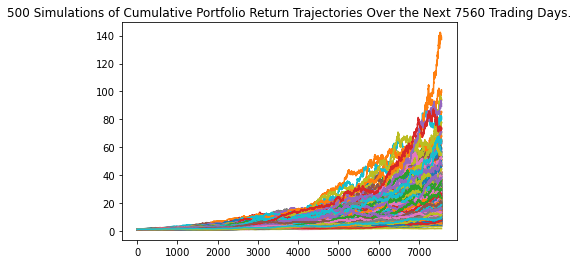

In [328]:
# Plot simulation outcomes
line_plot = df_stock_data_mc_simulation.plot_simulation()

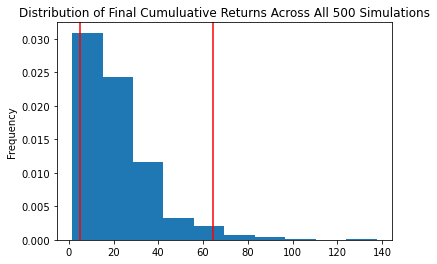

In [329]:
# Plot probability distribution and confidence intervals
dist_plot = df_stock_data_mc_simulation.plot_distribution()

### Retirement Analysis

In [330]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl =df_stock_data_mc_simulation.summarize_cumulative_return()

# Print summary statistics
even_tbl

count           500.000000
mean             22.140883
std              16.504508
min               1.538774
25%              10.596856
50%              17.836651
75%              28.696650
max             137.438974
95% CI Lower      4.839450
95% CI Upper     64.490888
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [331]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $96789.0 and $1289817.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [332]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_a = round(even_tbl[8]*30000,2)
ci_upper_a = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_a} and ${ci_upper_a}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145183.51 and $1934726.64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [333]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
df_stock_data_mc_simulation_5year = MCSimulation(df_stock_data,weights = [0.4,0.6],num_simulation = 500,num_trading_days = 252*5)

In [334]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
df_stock_data_mc_simulation_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002200,1.006052,0.987690,1.005795,1.000367,1.002364,1.011165,0.990156,1.011007,0.995923,...,0.988049,0.984440,0.998608,1.008324,1.003124,0.999495,0.997762,1.000149,0.989899,1.010344
2,1.001658,1.007823,0.989034,1.001747,0.996223,0.997834,1.017898,0.991373,1.000290,1.005389,...,0.996380,0.983414,0.996217,1.009113,1.009375,0.991622,0.981498,1.010727,0.981318,1.011191
3,1.004646,1.005318,0.998845,0.998256,0.990735,1.010203,1.006388,1.004564,1.006241,1.001454,...,0.984552,0.977754,1.000312,1.007750,1.010752,0.997870,0.987852,1.011108,0.968548,1.028317
4,1.014277,1.011449,0.994081,0.986753,0.983610,1.009198,0.994641,0.987909,1.006404,1.008378,...,0.986676,0.990612,1.020539,1.017364,1.021319,1.006064,0.979898,1.009679,0.972097,1.041643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.256209,2.755173,2.216053,1.391514,2.112130,1.348626,1.219753,2.881879,1.819344,1.371734,...,1.227671,2.015436,1.876070,1.072592,1.295305,1.427554,1.257085,1.330349,2.346552,2.246790
1257,1.254605,2.742453,2.197793,1.369420,2.108648,1.338129,1.225301,2.883207,1.837531,1.369437,...,1.231389,2.007784,1.888973,1.086415,1.306958,1.431020,1.250486,1.336229,2.373869,2.264082
1258,1.251463,2.707164,2.201221,1.379710,2.114185,1.326066,1.238294,2.922757,1.840782,1.366677,...,1.216985,2.025458,1.870514,1.087016,1.308806,1.394732,1.234216,1.330718,2.380044,2.223783
1259,1.245021,2.720682,2.193147,1.383318,2.100805,1.345117,1.228473,2.928744,1.868661,1.368785,...,1.209040,2.032117,1.856662,1.093790,1.316058,1.418614,1.236522,1.336446,2.400843,2.202917


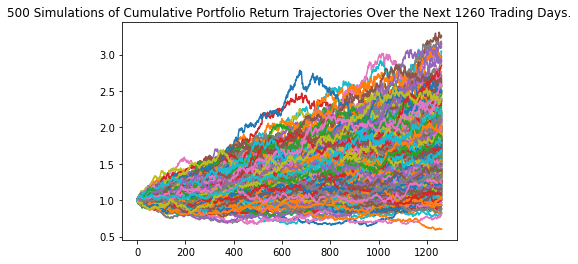

In [335]:
# Plot simulation outcomes
line_plot_5year = df_stock_data_mc_simulation_5year.plot_simulation()

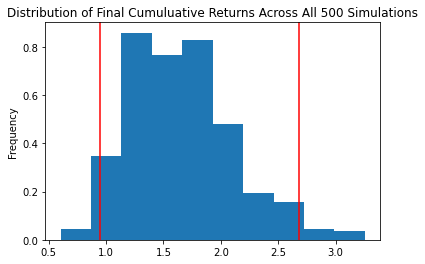

In [336]:
# Plot probability distribution and confidence intervals
dist_plot_5year = df_stock_data_mc_simulation_5year.plot_distribution()

In [337]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5year =df_stock_data_mc_simulation_5year.summarize_cumulative_return()

# Print summary statistics
even_tbl_5year

count           500.000000
mean              1.654839
std               0.455322
min               0.603484
25%               1.322606
50%               1.613803
75%               1.918506
max               3.255370
95% CI Lower      0.948594
95% CI Upper      2.684460
Name: 1260, dtype: float64

In [338]:
# Set initial investment
initial_investment_5year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5year[8]*initial_investment_5year,2)
ci_upper_five = round(even_tbl_5year[9]*initial_investment_5year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $37943.77 and $107378.39


### Ten Years Retirement Option

In [339]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
df_stock_data_mc_simulation_10year = MCSimulation(df_stock_data,weights = [0.4,0.6],num_simulation = 500,num_trading_days = 252*10)

In [340]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
df_stock_data_mc_simulation_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993894,0.994239,1.000248,1.000726,1.003068,1.003696,0.995454,1.000109,0.999143,1.006316,...,1.000319,0.991750,1.007214,0.997236,1.001585,1.012471,1.004776,1.013107,0.998781,1.004011
2,0.995586,0.996181,0.999409,1.006485,1.010948,0.996429,0.988186,0.996739,1.003884,0.994613,...,1.002119,0.981245,1.011055,1.005698,0.995658,1.012422,0.999210,1.018107,0.995291,1.009651
3,0.990121,0.998675,0.997881,0.985773,1.013809,0.994187,0.988101,0.995635,0.985121,0.986168,...,0.992577,0.984858,1.013301,1.022380,0.993885,1.020554,0.998219,1.016225,1.000629,1.008152
4,0.982509,0.997786,0.998091,0.984630,1.020077,1.000416,0.984747,0.981879,0.979017,0.984334,...,0.987953,0.992617,1.011659,1.012611,0.996778,1.010716,1.002338,1.008043,1.005980,1.018763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.248376,1.889425,3.090140,2.120931,1.770365,2.425391,3.090036,1.429620,2.633118,1.617461,...,1.200061,1.659681,2.267944,3.366615,3.811311,3.078257,2.324868,3.620700,3.528125,2.991286
2517,1.247328,1.880325,3.072416,2.121405,1.785556,2.444508,3.134565,1.436893,2.664399,1.624534,...,1.186938,1.681101,2.298307,3.408741,3.833053,3.054527,2.316702,3.646397,3.520987,2.989970
2518,1.255538,1.882002,3.099970,2.124488,1.773727,2.493882,3.156847,1.414912,2.672838,1.621841,...,1.181103,1.702424,2.316381,3.417230,3.793947,3.046280,2.308733,3.610566,3.505245,2.993743
2519,1.251510,1.870918,3.048592,2.117413,1.762976,2.523717,3.165270,1.418611,2.698348,1.641681,...,1.181399,1.710994,2.316245,3.409388,3.776021,3.077200,2.297981,3.645333,3.494274,2.983196


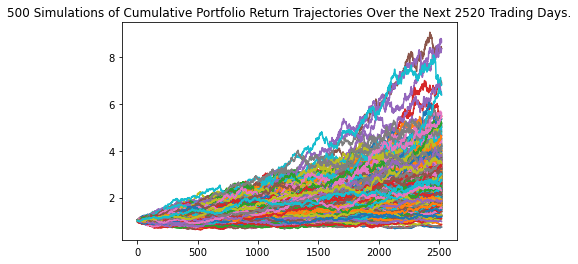

In [341]:
# Plot simulation outcomes
line_plot_10year = df_stock_data_mc_simulation_10year.plot_simulation()

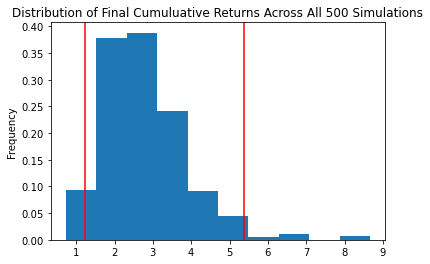

In [342]:
# Plot probability distribution and confidence intervals
dist_plot_10year = df_stock_data_mc_simulation_10year.plot_distribution()

In [343]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10year =df_stock_data_mc_simulation_10year.summarize_cumulative_return()

# Print summary statistics
even_tbl_10year

count           500.000000
mean              2.789680
std               1.106586
min               0.729819
25%               2.045411
50%               2.590925
75%               3.348540
max               8.665401
95% CI Lower      1.221212
95% CI Upper      5.366540
Name: 2520, dtype: float64

In [345]:
# Set initial investment

initial_investment_10year = 35000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10year[8]*initial_investment_5year,2)
ci_upper_ten = round(even_tbl_10year[9]*initial_investment_5year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $48848.47 and $214661.61
